<a href="https://colab.research.google.com/github/susanazhou/corpus-automation/blob/main/INCLUDE_analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-2-3490432894.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=aciertos_por_pais.index, y=aciertos_por_pais.values, palette="Blues_d")
/tmp/ipython-input-2-3490432894.py:27: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


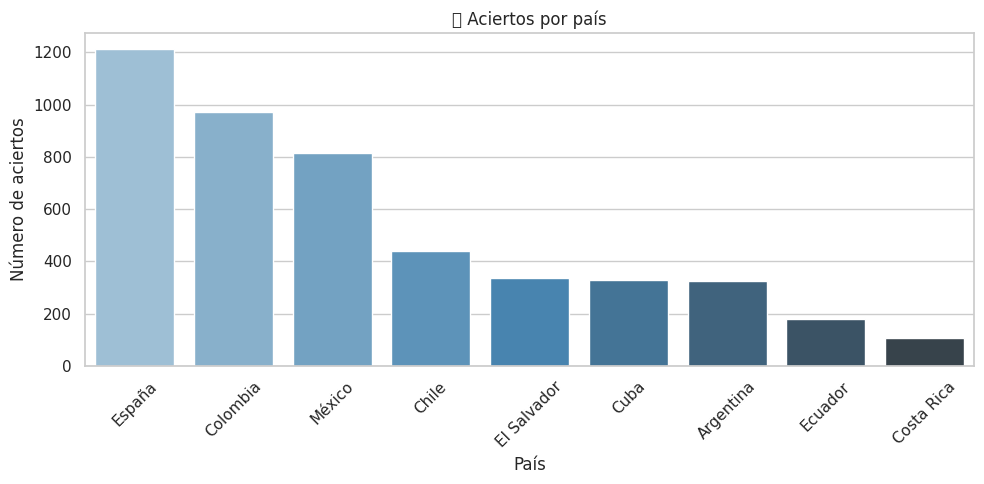

/tmp/ipython-input-2-3490432894.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=aciertos_por_dominio.index, y=aciertos_por_dominio.values, palette="Greens_d")
/tmp/ipython-input-2-3490432894.py:38: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


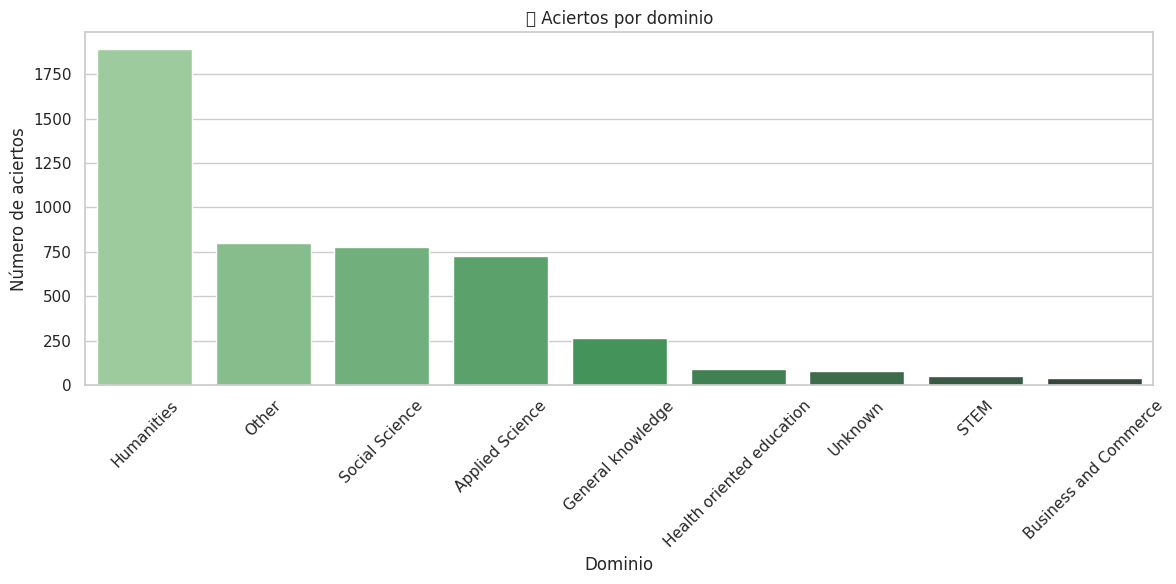

/tmp/ipython-input-2-3490432894.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=aciertos_por_nivel.index, y=aciertos_por_nivel.values, palette="Oranges_d")
/tmp/ipython-input-2-3490432894.py:49: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


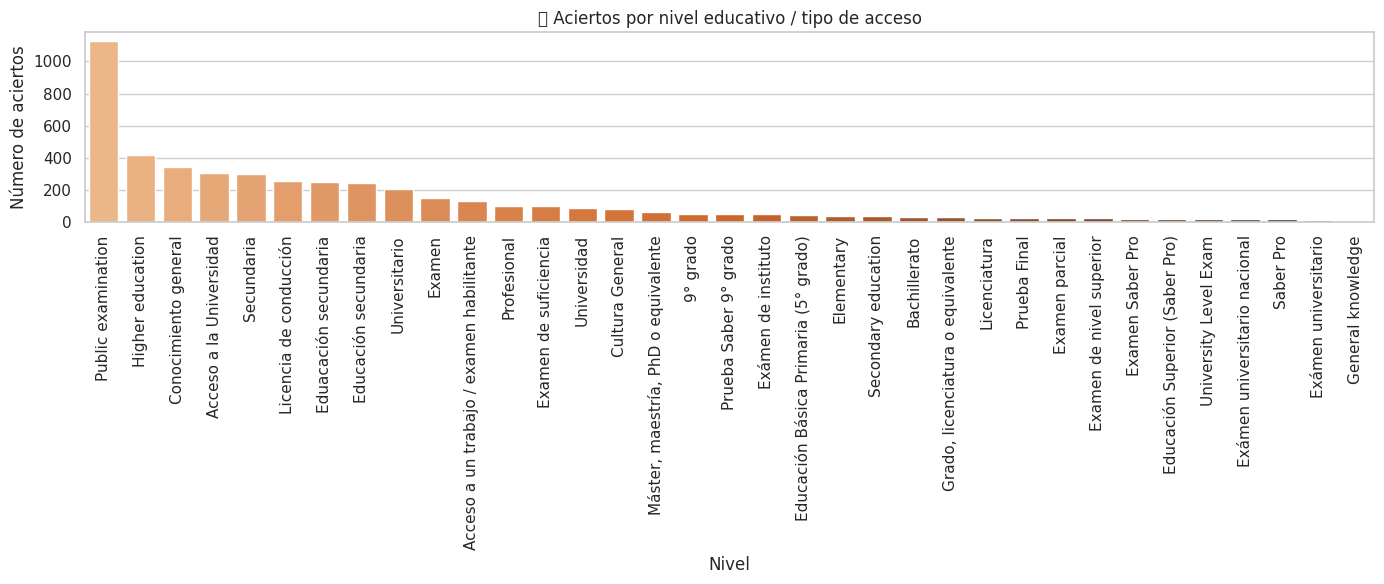

/tmp/ipython-input-2-3490432894.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=aciertos_por_examen.index, y=aciertos_por_examen.values, palette="Purples_d")
/tmp/ipython-input-2-3490432894.py:61: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2-3490432894.py:61: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


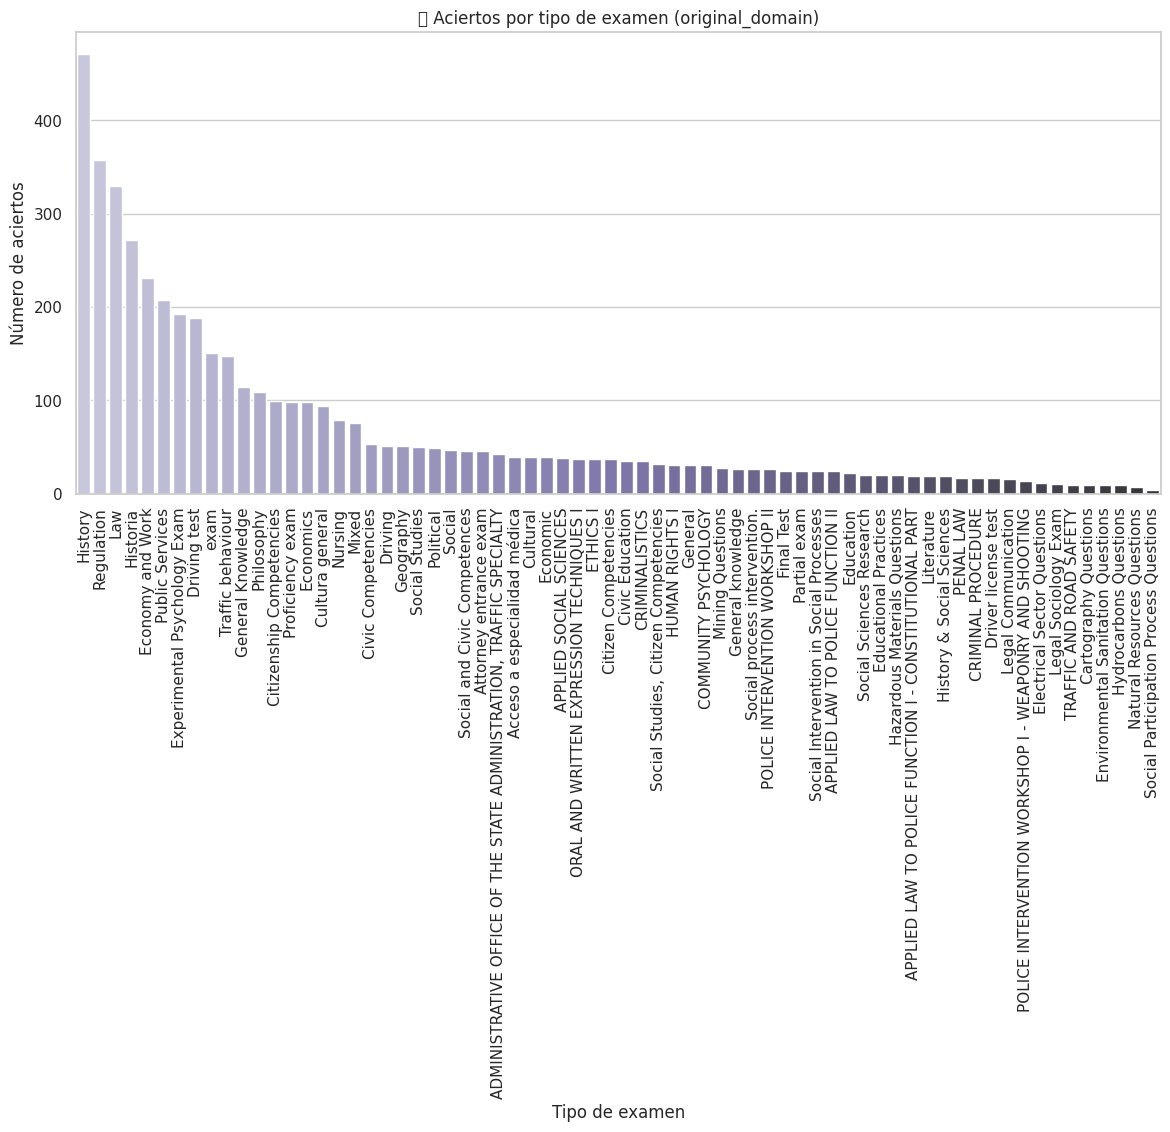

In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
with open('spanish.json', 'r', encoding='utf-8') as f:
    data = [json.loads(line) for line in f]

df = pd.DataFrame(data)

# Codificar predicciones y calcular aciertos
mapa_letras = {'A': 0, 'B': 1, 'C': 2, 'D': 3}
df['prediction_num'] = df['prediction_gpt'].map(mapa_letras)
df['correct'] = df['answer'] == df['prediction_num']

sns.set(style="whitegrid")

# --- Aciertos por pa√≠s ---
aciertos_por_pais = df.groupby('country')['correct'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=aciertos_por_pais.index, y=aciertos_por_pais.values, palette="Blues_d")
plt.title('‚úÖ Aciertos por pa√≠s')
plt.xlabel('Pa√≠s')
plt.ylabel('N√∫mero de aciertos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Aciertos por dominio ---
aciertos_por_dominio = df.groupby('domain')['correct'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=aciertos_por_dominio.index, y=aciertos_por_dominio.values, palette="Greens_d")
plt.title('‚úÖ Aciertos por dominio')
plt.xlabel('Dominio')
plt.ylabel('N√∫mero de aciertos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Aciertos por nivel ---
aciertos_por_nivel = df.groupby('level')['correct'].sum().sort_values(ascending=False)
plt.figure(figsize=(14, 6))
sns.barplot(x=aciertos_por_nivel.index, y=aciertos_por_nivel.values, palette="Oranges_d")
plt.title('‚úÖ Aciertos por nivel educativo / tipo de acceso')
plt.xlabel('Nivel')
plt.ylabel('N√∫mero de aciertos')
plt.xticks(rotation=90)  # Gira las etiquetas para evitar superposici√≥n
plt.tight_layout()
plt.show()


# --- Aciertos por tipo de examen (original_domain) ---
aciertos_por_examen = df.groupby('original_domain')['correct'].sum().sort_values(ascending=False)
plt.figure(figsize=(14, 6))
sns.barplot(x=aciertos_por_examen.index, y=aciertos_por_examen.values, palette="Purples_d")
plt.title('‚úÖ Aciertos por tipo de examen (original_domain)')
plt.xlabel('Tipo de examen')
plt.ylabel('N√∫mero de aciertos')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


/tmp/ipython-input-3-1429828540.py:31: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


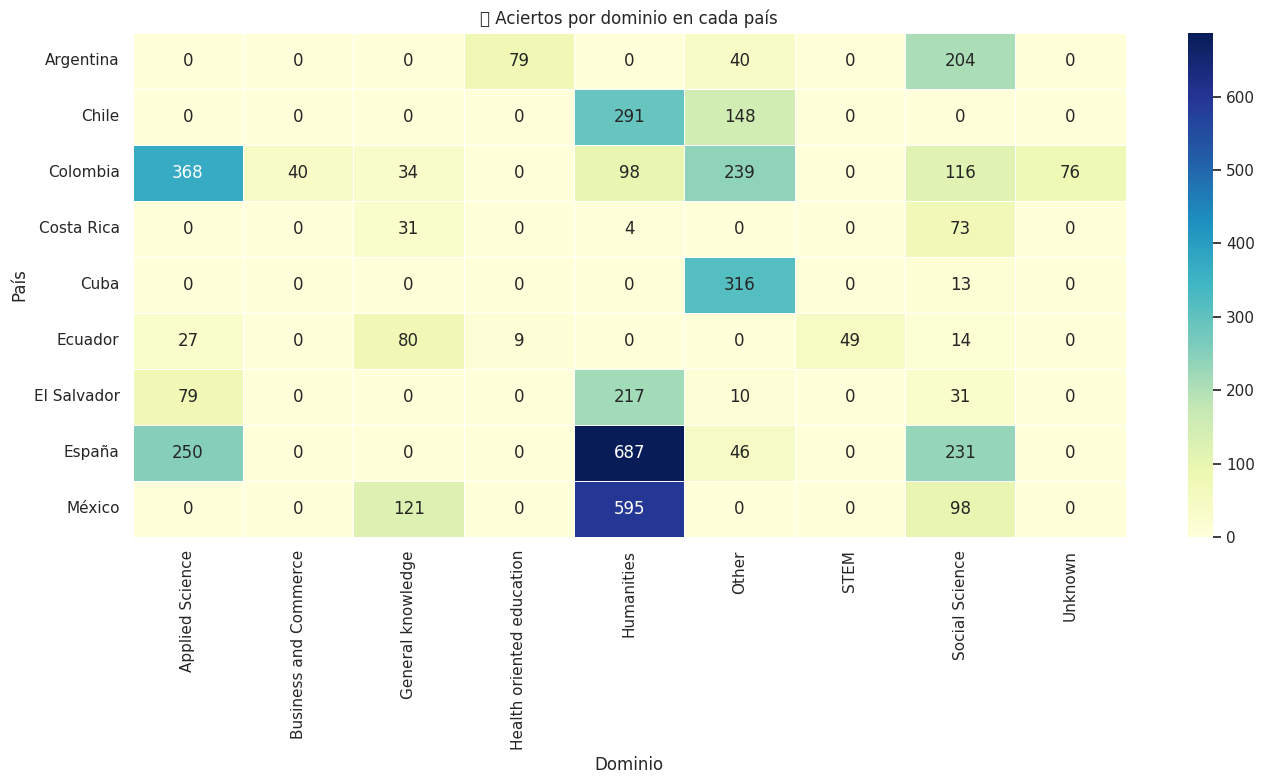

In [3]:
# Qu√© dominio es m√°s fuerte en cada pa√≠s:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Cargar los datos
with open('spanish.json', 'r', encoding='utf-8') as f:
    data = [json.loads(line) for line in f]

df = pd.DataFrame(data)

# Evaluar aciertos
mapa_letras = {'A': 0, 'B': 1, 'C': 2, 'D': 3}
df['prediction_num'] = df['prediction_gpt'].map(mapa_letras)
df['correct'] = df['answer'] == df['prediction_num']

# Crear tabla cruzada: pa√≠s vs dominio con n√∫mero de aciertos
tabla = pd.crosstab(index=df['country'], columns=df['domain'], values=df['correct'], aggfunc='sum').fillna(0)

# Opcional: normalizar por fila para ver proporciones
# tabla = tabla.div(tabla.sum(axis=1), axis=0)

# Crear el heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(tabla, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.5)
plt.title('‚úÖ Aciertos por dominio en cada pa√≠s')
plt.xlabel('Dominio')
plt.ylabel('Pa√≠s')
plt.tight_layout()
plt.show()


/tmp/ipython-input-4-2623861506.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=resumen.index, y=resumen['porcentaje_aciertos'], palette="coolwarm")
/tmp/ipython-input-4-2623861506.py:40: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


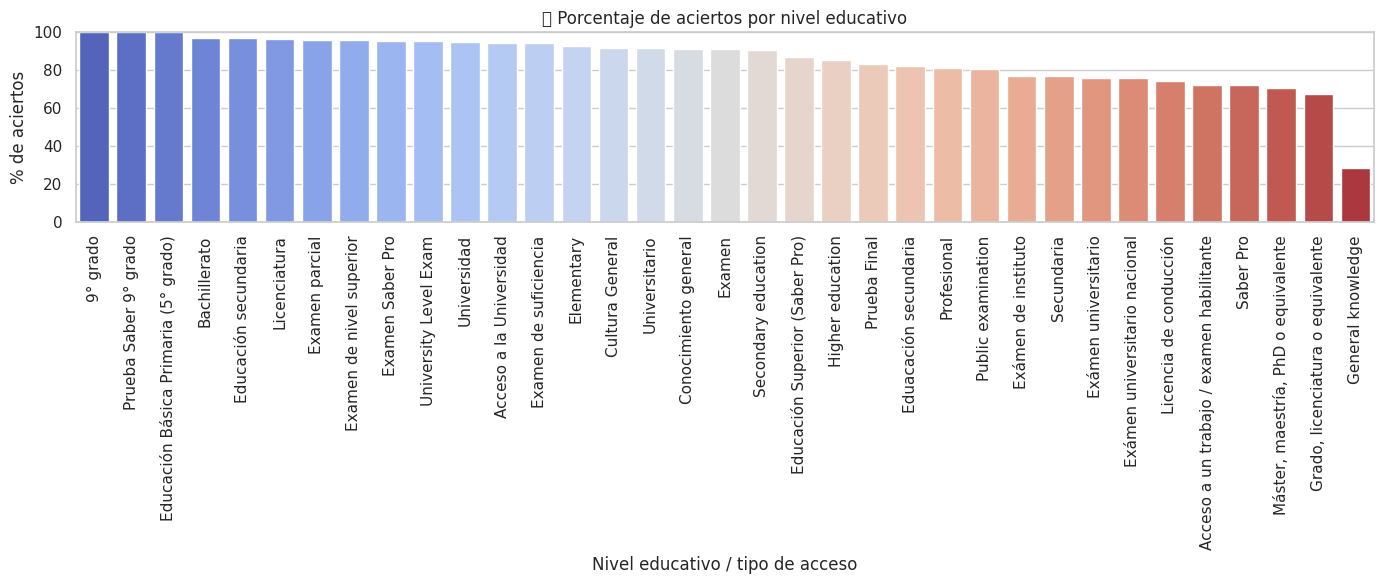

In [4]:
# Porcentaje de aciertos por nivel educativo (level):

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Cargar los datos
with open('spanish.json', 'r', encoding='utf-8') as f:
    data = [json.loads(line) for line in f]

df = pd.DataFrame(data)

# Preparar columna de aciertos
mapa_letras = {'A': 0, 'B': 1, 'C': 2, 'D': 3}
df['prediction_num'] = df['prediction_gpt'].map(mapa_letras)
df['correct'] = df['answer'] == df['prediction_num']

# Rellenar niveles nulos si existen
df['level'] = df['level'].fillna('Desconocido')

# Calcular total de preguntas y aciertos por nivel
resumen = df.groupby('level').agg(
    total_preguntas=('correct', 'count'),
    aciertos=('correct', 'sum')
)

# Calcular porcentaje
resumen['porcentaje_aciertos'] = (resumen['aciertos'] / resumen['total_preguntas']) * 100
resumen = resumen.sort_values('porcentaje_aciertos', ascending=False)

# Visualizaci√≥n
plt.figure(figsize=(14, 6))
sns.barplot(x=resumen.index, y=resumen['porcentaje_aciertos'], palette="coolwarm")
plt.title('üéì Porcentaje de aciertos por nivel educativo')
plt.ylabel('% de aciertos')
plt.xlabel('Nivel educativo / tipo de acceso')
plt.xticks(rotation=90)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


/tmp/ipython-input-1-2174889232.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=resumen.index, y=resumen['porcentaje_aciertos'], palette="viridis")
/tmp/ipython-input-1-2174889232.py:38: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


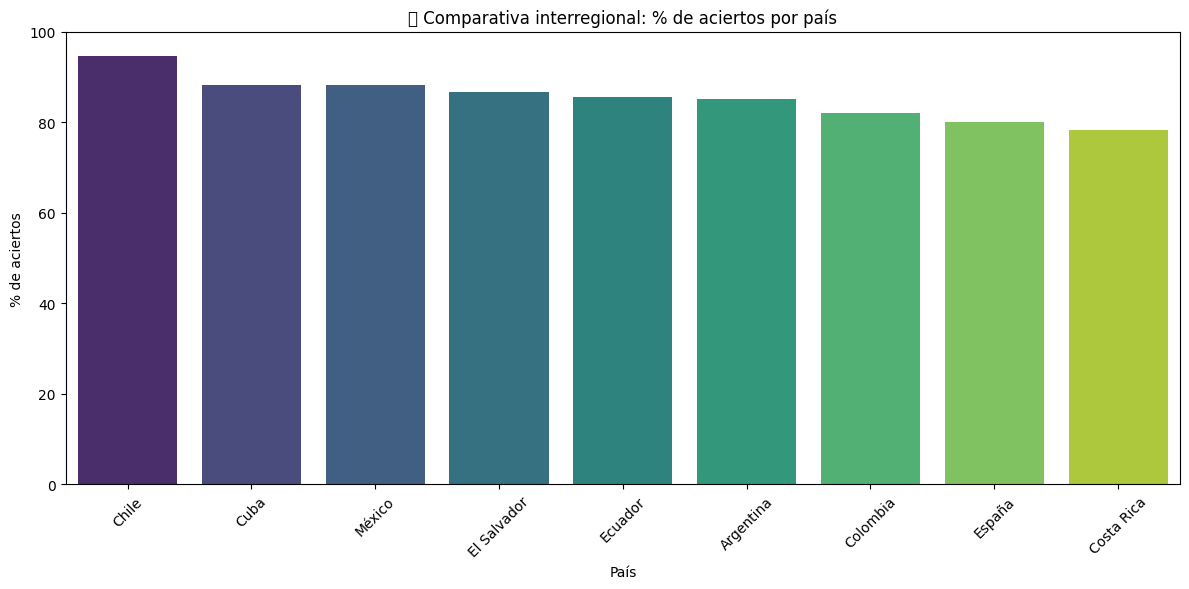

In [1]:
# Comparativa interregional de rendimiento GPT-4 (por pa√≠s):

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Cargar el archivo JSON
with open('spanish.json', 'r', encoding='utf-8') as f:
    data = [json.loads(line) for line in f]

df = pd.DataFrame(data)

# Codificar predicci√≥n
mapa_letras = {'A': 0, 'B': 1, 'C': 2, 'D': 3}
df['prediction_num'] = df['prediction_gpt'].map(mapa_letras)
df['correct'] = df['answer'] == df['prediction_num']

# Limpiar nulos en pa√≠s
df['country'] = df['country'].fillna('Desconocido')

# Agrupar por pa√≠s
resumen = df.groupby('country').agg(
    total_preguntas=('correct', 'count'),
    aciertos=('correct', 'sum')
)
resumen['porcentaje_aciertos'] = (resumen['aciertos'] / resumen['total_preguntas']) * 100
resumen = resumen.sort_values('porcentaje_aciertos', ascending=False)

# Visualizar
plt.figure(figsize=(12, 6))
sns.barplot(x=resumen.index, y=resumen['porcentaje_aciertos'], palette="viridis")
plt.title('üåç Comparativa interregional: % de aciertos por pa√≠s')
plt.ylabel('% de aciertos')
plt.xlabel('Pa√≠s')
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-2-1612978967.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=resumen.index, y=resumen['porcentaje'], palette='Set2')
/tmp/ipython-input-2-1612978967.py:51: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


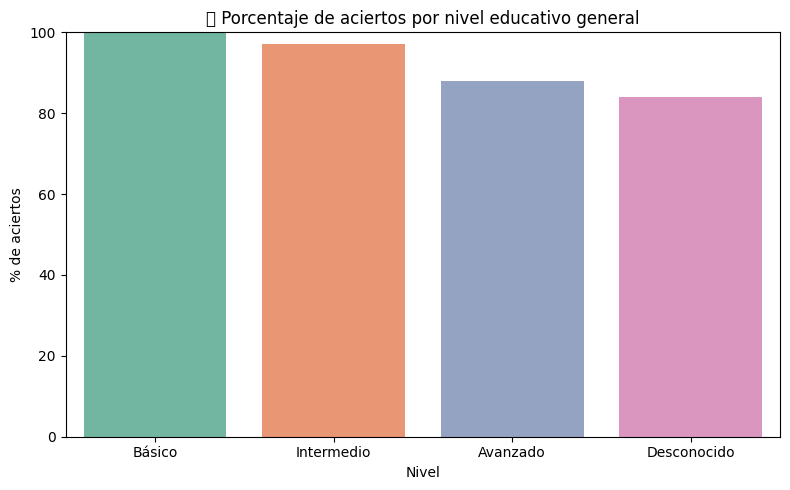

In [2]:
# Porcentaje de aciertos por categor√≠a de nivel:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Cargar el archivo
with open('spanish.json', 'r', encoding='utf-8') as f:
    data = [json.loads(line) for line in f]

df = pd.DataFrame(data)

# Calcular aciertos
mapa_letras = {'A': 0, 'B': 1, 'C': 2, 'D': 3}
df['prediction_num'] = df['prediction_gpt'].map(mapa_letras)
df['correct'] = df['answer'] == df['prediction_num']

# Mapeo personalizado a niveles generales
def categorizar_nivel(nivel):
    if pd.isna(nivel):
        return 'Desconocido'
    nivel = nivel.lower()
    if "b√°sico" in nivel or "primaria" in nivel:
        return "B√°sico"
    elif "medio" in nivel or "bachillerato" in nivel or "intermedio" in nivel:
        return "Intermedio"
    elif "universidad" in nivel or "acceso a un trabajo" in nivel or "postgrado" in nivel or "habilitante" in nivel:
        return "Avanzado"
    else:
        return "Desconocido"

# Crear columna con nivel general
df['nivel_general'] = df['level'].apply(categorizar_nivel)

# Agrupar y calcular tasa de acierto
resumen = df.groupby('nivel_general').agg(
    total=('correct', 'count'),
    aciertos=('correct', 'sum')
)
resumen['porcentaje'] = (resumen['aciertos'] / resumen['total']) * 100
resumen = resumen.sort_values('porcentaje', ascending=False)

# Gr√°fico
plt.figure(figsize=(8, 5))
sns.barplot(x=resumen.index, y=resumen['porcentaje'], palette='Set2')
plt.title("üéì Porcentaje de aciertos por nivel educativo general")
plt.ylabel('% de aciertos')
plt.xlabel('Nivel')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


/tmp/ipython-input-3-1696478993.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=resumen.index, y=resumen['porcentaje_aciertos'], palette="Pastel1")
/tmp/ipython-input-3-1696478993.py:48: UserWarning: Glyph 128736 (\N{HAMMER AND WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3-1696478993.py:48: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128736 (\N{HAMMER AND WRENCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


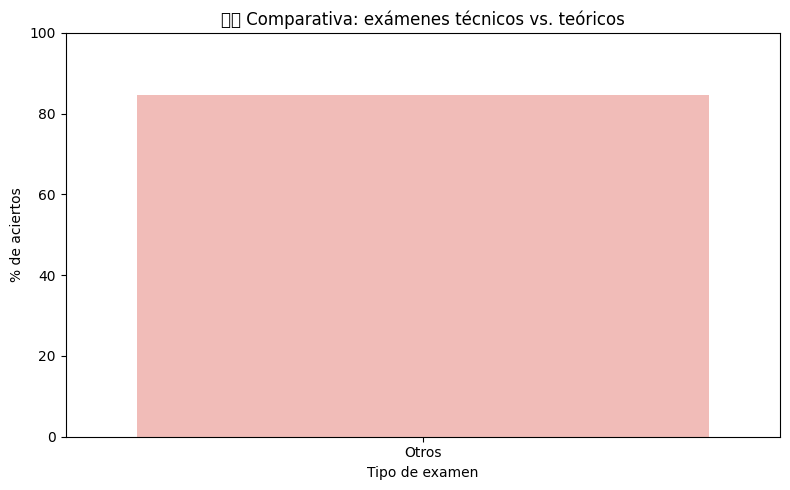

In [3]:
# Comparativa de rendimiento entre ex√°menes t√©cnicos y te√≥ricos:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Cargar los datos
with open('spanish.json', 'r', encoding='utf-8') as f:
    data = [json.loads(line) for line in f]

df = pd.DataFrame(data)

# Calcular aciertos
mapa_letras = {'A': 0, 'B': 1, 'C': 2, 'D': 3}
df['prediction_num'] = df['prediction_gpt'].map(mapa_letras)
df['correct'] = df['answer'] == df['prediction_num']

# Clasificar dominios en t√©cnicos o te√≥ricos
def clasificar_tipo_examen(dom):
    if pd.isna(dom):
        return 'Desconocido'
    dom = dom.lower()
    if any(x in dom for x in ['ciencia', 'ingenier√≠a', 'mec√°nica', 'transporte', 'tecnolog√≠a']):
        return 'T√©cnico'
    elif any(x in dom for x in ['derecho', 'policy', 'administraci√≥n', 'jur√≠dic', 'legal']):
        return 'Te√≥rico'
    else:
        return 'Otros'

df['tipo_examen'] = df['domain'].apply(clasificar_tipo_examen)

# Calcular tasa de acierto por tipo
resumen = df.groupby('tipo_examen').agg(
    total_preguntas=('correct', 'count'),
    aciertos=('correct', 'sum')
)
resumen['porcentaje_aciertos'] = (resumen['aciertos'] / resumen['total_preguntas']) * 100
resumen = resumen.sort_values('porcentaje_aciertos', ascending=False)

# Gr√°fico
plt.figure(figsize=(8, 5))
sns.barplot(x=resumen.index, y=resumen['porcentaje_aciertos'], palette="Pastel1")
plt.title('üõ†Ô∏èüìö Comparativa: ex√°menes t√©cnicos vs. te√≥ricos')
plt.ylabel('% de aciertos')
plt.xlabel('Tipo de examen')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


/tmp/ipython-input-6-1500094314.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=errores_por_dominio.index, y=errores_por_dominio.values, palette="Reds_r")
/tmp/ipython-input-6-1500094314.py:31: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


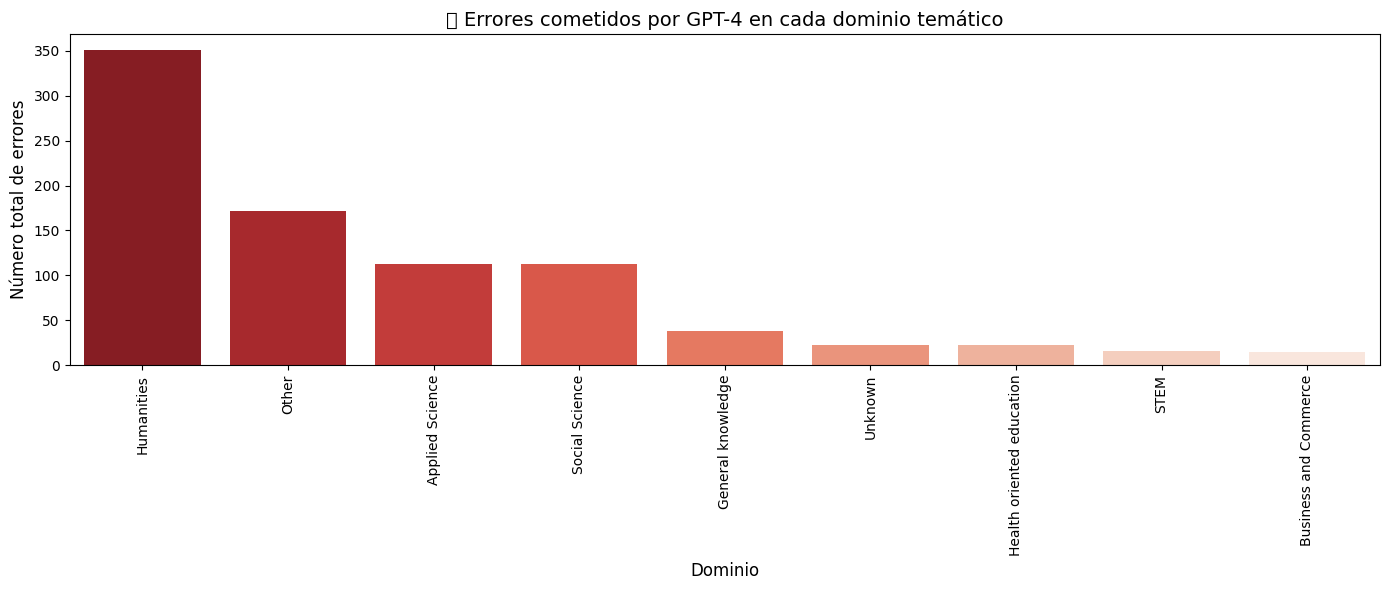

In [6]:
# Gr√°fico de errores por dominio:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Cargar datos
with open('spanish.json', 'r', encoding='utf-8') as f:
    data = [json.loads(line) for line in f]

df = pd.DataFrame(data)

# Calcular errores
mapa_letras = {'A': 0, 'B': 1, 'C': 2, 'D': 3}
df['prediction_num'] = df['prediction_gpt'].map(mapa_letras)
df['correct'] = df['answer'] == df['prediction_num']
df['error'] = ~df['correct']

# Agrupar por dominio
errores_por_dominio = df.groupby('domain')['error'].sum().sort_values(ascending=False)

# Visualizar
plt.figure(figsize=(14, 6))  # Aumenta el tama√±o horizontal
sns.barplot(x=errores_por_dominio.index, y=errores_por_dominio.values, palette="Reds_r")
plt.title('‚ùå Errores cometidos por GPT-4 en cada dominio tem√°tico', fontsize=14)
plt.ylabel('N√∫mero total de errores', fontsize=12)
plt.xlabel('Dominio', fontsize=12)
plt.xticks(rotation=90, fontsize=10)  # Rota las etiquetas y agranda un poco la fuente
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()



In [9]:
# Tabla simple y legible de errores frecuentes:

import pandas as pd
import json

# Cargar datos
with open('spanish.json', 'r', encoding='utf-8') as f:
    data = [json.loads(line) for line in f]

df = pd.DataFrame(data)

# Calcular errores
mapa_letras = {'A': 0, 'B': 1, 'C': 2, 'D': 3}
df['prediction_num'] = df['prediction_gpt'].map(mapa_letras)
df['correct'] = df['answer'] == df['prediction_num']
df['error'] = ~df['correct']

# Seleccionar preguntas falladas
fallos = df[df['error']].copy()

# Recortar enunciado de la pregunta
fallos['pregunta_resumida'] = fallos['question'].apply(lambda x: x[:80] + "..." if len(x) > 80 else x)

# Mostrar las m√°s recientes o representativas
fallos_resumen = fallos[['domain', 'level', 'pregunta_resumida', 'answer', 'prediction_gpt']].head(10)

# Mostrar tabla ordenada y clara
fallos_resumen.rename(columns={
    'domain': 'Dominio',
    'level': 'Nivel',
    'pregunta_resumida': 'Pregunta',
    'answer': 'Correcta',
    'prediction_gpt': 'GPT-4 predijo'
}, inplace=True)

pd.set_option('display.max_colwidth', None)
fallos_resumen



Dominio                                     Nivel  \
0   Applied Science  Acceso a un trabajo / examen habilitante   
5   Applied Science  Acceso a un trabajo / examen habilitante   
7   Applied Science  Acceso a un trabajo / examen habilitante   
11  Applied Science  Acceso a un trabajo / examen habilitante   
16  Applied Science  Acceso a un trabajo / examen habilitante   
32  Applied Science  Acceso a un trabajo / examen habilitante   
36  Applied Science  Acceso a un trabajo / examen habilitante   
39  Applied Science  Acceso a un trabajo / examen habilitante   
40  Applied Science  Acceso a un trabajo / examen habilitante   
51  Applied Science  Acceso a un trabajo / examen habilitante   

                                                                               Pregunta  \
0   Indique cu√°l de las siguientes actuaciones es la correcta para tomar una curva a...   
5   De acuerdo con el Real Decreto 920/2017, de 23 de octubre, por el que se regula ...   
7   El Real Decreto 818/2009, de 8 de mayo, por el que se aprueba el Reglamento Gene...   
11  Indique la respuesta correcta en relaci√≥n con los requisitos generales de los ve...   
16  En relaci√≥n con la resoluci√≥n de acceso a la informaci√≥n regulada en el art√≠culo...   
32  Atendiendo a lo establecido en el Real Decreto 1428/2003, de 21 de noviembre, po...   
36  Conforme al Real Decreto 818/2009, de 8 de mayo, por el que se aprueba el Reglam...   
39  Seg√∫n el Real Decreto Legislativo 6/2015, de 30 de octubre, por el que se aprueb...   
40  Seg√∫n el art√≠culo 19 de la Ley 29/1998, de 13 de julio, Reguladora de la Jurisdi...   
51  C√≥mo m√≠nimo, ¬øqu√© permiso o licencia de conducci√≥n y posibles requisitos adicion...   

    Correcta GPT-4 predijo  
0          2             A  
5          3             B  
7          3             A  
11         0             D  
16         2             B  
32         1             D  
36         3             A  
39         2             A  
40         3             C  
51         3             A

/tmp/ipython-input-10-412117393.py:31: UserWarning: Glyph 128207 (\N{STRAIGHT RULER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128207 (\N{STRAIGHT RULER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128207 (\N{STRAIGHT RULER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


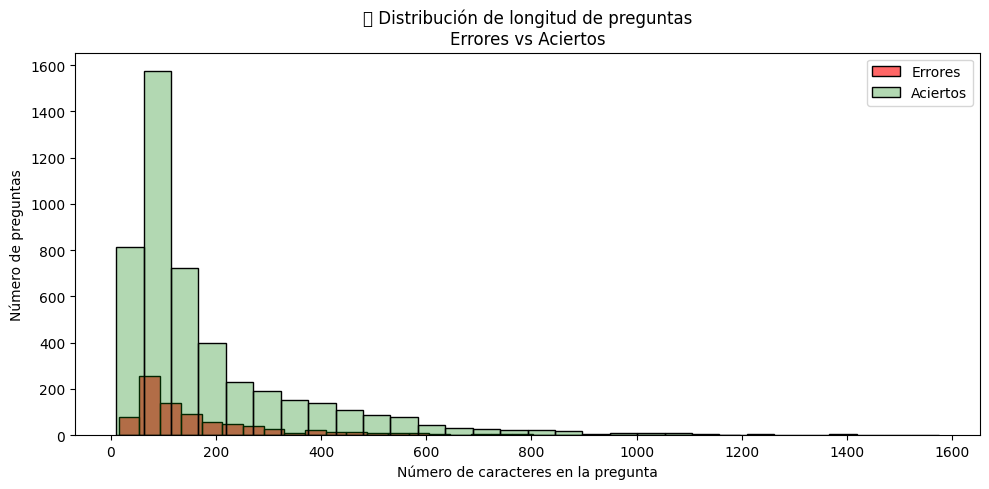

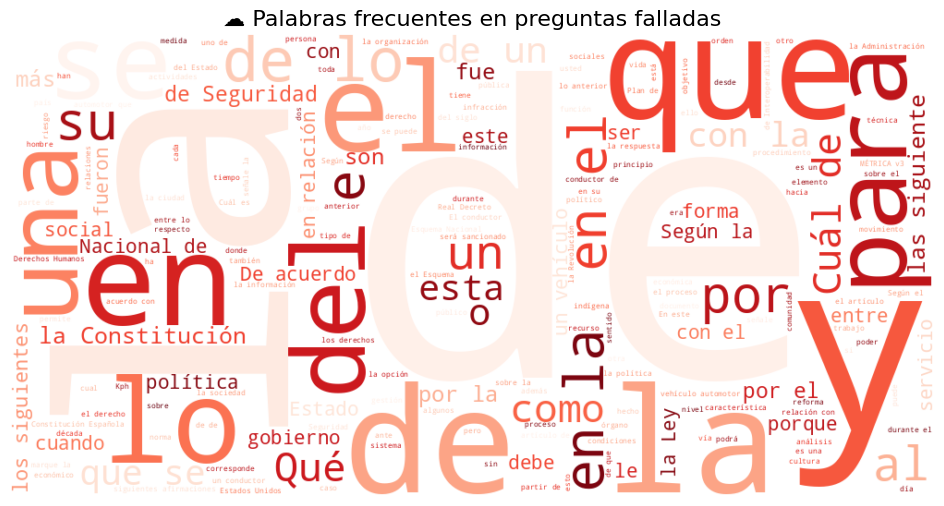

In [10]:
!pip install wordcloud
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from wordcloud import WordCloud

# Cargar datos
with open('spanish.json', 'r', encoding='utf-8') as f:
    data = [json.loads(line) for line in f]
df = pd.DataFrame(data)

# Calcular aciertos y errores
mapa_letras = {'A': 0, 'B': 1, 'C': 2, 'D': 3}
df['prediction_num'] = df['prediction_gpt'].map(mapa_letras)
df['correct'] = df['answer'] == df['prediction_num']
df['error'] = ~df['correct']

# ===============================
# üìè 1. LONGITUD de pregunta vs errores
# ===============================
df['longitud_pregunta'] = df['question'].str.len()

plt.figure(figsize=(10, 5))
sns.histplot(data=df[df['error']], x='longitud_pregunta', bins=30, color='red', alpha=0.6, label='Errores')
sns.histplot(data=df[df['correct']], x='longitud_pregunta', bins=30, color='green', alpha=0.3, label='Aciertos')
plt.title('üìè Distribuci√≥n de longitud de preguntas\nErrores vs Aciertos')
plt.xlabel('N√∫mero de caracteres en la pregunta')
plt.ylabel('N√∫mero de preguntas')
plt.legend()
plt.tight_layout()
plt.show()

# ===============================
# ‚òÅÔ∏è 2. Wordcloud de preguntas falladas
# ===============================
texto_fallos = " ".join(df[df['error']]['question'].dropna().tolist())

wordcloud = WordCloud(width=1000, height=500, background_color='white', colormap='Reds').generate(texto_fallos)

plt.figure(figsize=(14, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("‚òÅÔ∏è Palabras frecuentes en preguntas falladas", fontsize=16)
plt.show()


In [12]:
!pip install langdetect

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 981.5/981.5 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=706cf97a77b45026af04bc0ebab6279287db1938f16ce9dbe8082f9bebacd79a
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/tmp/ipython-input-13-3327683212.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=longitud_media.index, y=longitud_media.values, palette='Blues_d')


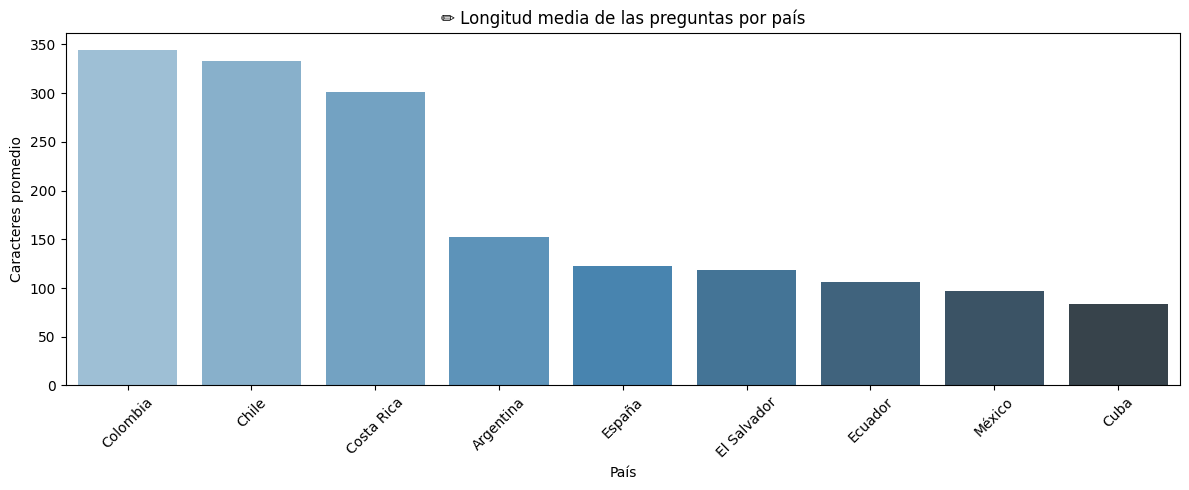

/tmp/ipython-input-13-3327683212.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentimiento_medio.index, y=sentimiento_medio.values, palette='coolwarm')


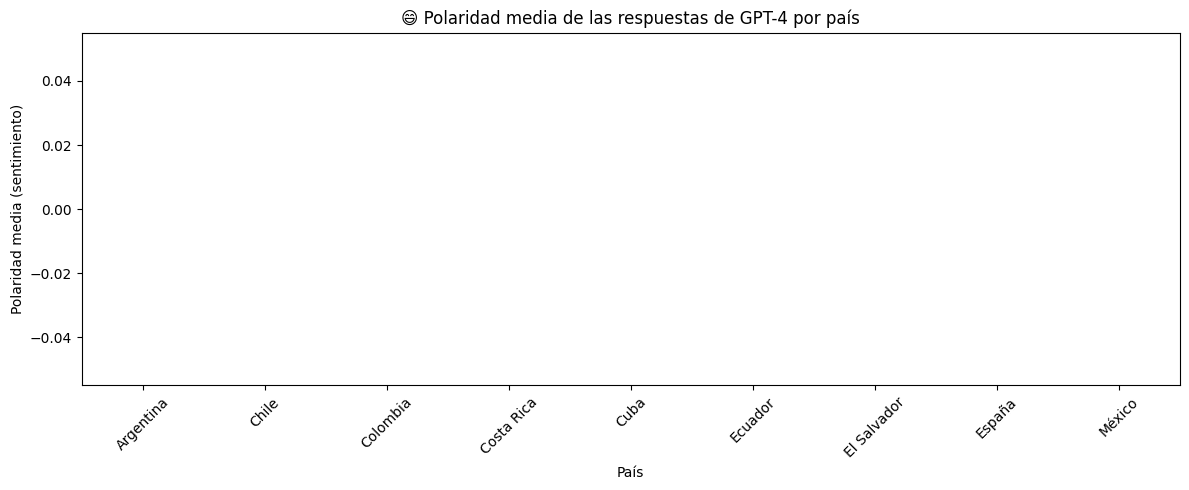

üó£Ô∏è Palabras comunes por pa√≠s (top 5):


Palabras frecuentes
Pa√≠s                            
Espa√±a       de, la, el, en, las
Costa Rica   de, la, el, en, que
M√©xico       de, la, el, en, que
Argentina    de, la, en, el, que
Cuba         de, la, qu√©, en, el
Colombia     de, la, el, en, que
El Salvador  de, la, que, el, en
Ecuador        de, la, el, en, y
Chile          de, la, en, el, a

In [13]:
# An√°lisis ling√º√≠stico por pa√≠s:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from textblob import TextBlob
from langdetect import detect
import nltk
nltk.download('punkt')

# Cargar los datos
with open('spanish.json', 'r', encoding='utf-8') as f:
    data = [json.loads(line) for line in f]

df = pd.DataFrame(data)

# Preprocesar
df['country'] = df['country'].fillna('Desconocido')
df['question'] = df['question'].fillna('')
df['prediction_gpt'] = df['prediction_gpt'].astype(str)

# 1Ô∏è‚É£ Longitud media de prompts por pa√≠s
df['longitud_prompt'] = df['question'].str.len()
longitud_media = df.groupby('country')['longitud_prompt'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 5))
sns.barplot(x=longitud_media.index, y=longitud_media.values, palette='Blues_d')
plt.title('‚úèÔ∏è Longitud media de las preguntas por pa√≠s')
plt.ylabel('Caracteres promedio')
plt.xlabel('Pa√≠s')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2Ô∏è‚É£ An√°lisis de sentimiento (polaridad) de la respuesta GPT por pa√≠s
def get_sentiment(text):
    try:
        blob = TextBlob(text)
        return blob.sentiment.polarity  # entre -1 (negativo) y 1 (positivo)
    except:
        return 0

df['sentimiento'] = df['prediction_gpt'].apply(get_sentiment)

sentimiento_medio = df.groupby('country')['sentimiento'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 5))
sns.barplot(x=sentimiento_medio.index, y=sentimiento_medio.values, palette='coolwarm')
plt.title('üòÑ Polaridad media de las respuestas de GPT-4 por pa√≠s')
plt.ylabel('Polaridad media (sentimiento)')
plt.xlabel('Pa√≠s')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3Ô∏è‚É£ Frecuencia de expresiones locales (palabras frecuentes por pa√≠s)
from collections import Counter
import re

def limpiar(texto):
    texto = texto.lower()
    texto = re.sub(r'[^\w\s]', '', texto)  # quitar puntuaci√≥n
    return texto

df['texto_limpio'] = df['question'].apply(limpiar)

# Contar palabras por pa√≠s
palabras_por_pais = {}

for pais in df['country'].unique():
    texto_total = " ".join(df[df['country'] == pais]['texto_limpio'])
    palabras = texto_total.split()
    contador = Counter(palabras)
    palabras_por_pais[pais] = contador

# Crear tabla con palabras comunes por pa√≠s (top 5 por pa√≠s)
tabla_frecuencias = {}

for pais, contador in palabras_por_pais.items():
    palabras_comunes = [palabra for palabra, freq in contador.most_common(5)]
    tabla_frecuencias[pais] = ", ".join(palabras_comunes)

tabla_frecuencias_df = pd.DataFrame.from_dict(tabla_frecuencias, orient='index', columns=['Palabras frecuentes'])
tabla_frecuencias_df.index.name = 'Pa√≠s'

# Mostrar la tabla
print("üó£Ô∏è Palabras comunes por pa√≠s (top 5):")
display(tabla_frecuencias_df)


In [ ]:
# An√°lisis ling√º√≠stico por pa√≠s:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from textblob import TextBlob
import nltk
nltk.download('punkt')

# Cargar los datos
with open('spanish.json', 'r', encoding='utf-8') as f:
    data = [json.loads(line) for line in f]

df = pd.DataFrame(data)

# Preprocesar
df['country'] = df['country'].fillna('Desconocido')
df['question'] = df['question'].fillna('')
df['prediction_gpt'] = df['prediction_gpt'].astype(str)

# 1Ô∏è‚É£ Longitud media de prompts por pa√≠s
df['longitud_prompt'] = df['question'].str.len()
longitud_media = df.groupby('country')['longitud_prompt'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 5))
sns.barplot(x=longitud_media.index, y=longitud_media.values, palette='Blues_d')
plt.title('‚úèÔ∏è Longitud media de las preguntas por pa√≠s')
plt.ylabel('Caracteres promedio')
plt.xlabel('Pa√≠s')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2Ô∏è‚É£ An√°lisis de sentimiento (polaridad) de la respuesta GPT por pa√≠s
def get_sentiment(text):
    try:
        blob = TextBlob(text)
        return blob.sentiment.polarity  # entre -1 (negativo) y 1 (positivo)
    except:
        return 0

df['sentimiento'] = df['prediction_gpt'].apply(get_sentiment)

sentimiento_medio = df.groupby('country')['sentimiento'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 5))
sns.barplot(x=sentimiento_medio.index, y=sentimiento_medio.values, palette='coolwarm')
plt.title('üòÑ Polaridad media de las respuestas de GPT-4 por pa√≠s')
plt.ylabel('Polaridad media (sentimiento)')
plt.xlabel('Pa√≠s')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3Ô∏è‚É£ Frecuencia de expresiones locales (palabras frecuentes por pa√≠s)
from collections import Counter
import re

def limpiar(texto):
    texto = texto.lower()
    texto = re.sub(r'[^\w\s]', '', texto)  # quitar puntuaci√≥n
    return texto

df['texto_limpio'] = df['question'].apply(limpiar)

# Contar palabras por pa√≠s
palabras_por_pais = {}

for pais in df['country'].unique():
    texto_total = " ".join(df[df['country'] == pais]['texto_limpio'])
    palabras = texto_total.split()
    contador = Counter(palabras)
    palabras_por_pais[pais] = contador

# Crear tabla con palabras comunes por pa√≠s (top 5 por pa√≠s)
tabla_frecuencias = {}

for pais, contador in palabras_por_pais.items():
    palabras_comunes = [palabra for palabra, freq in contador.most_common(5)]
    tabla_frecuencias[pais] = ", ".join(palabras_comunes)

tabla_frecuencias_df = pd.DataFrame.from_dict(tabla_frecuencias, orient='index', columns=['Palabras frecuentes'])
tabla_frecuencias_df.index.name = 'Pa√≠s'

# Mostrar la tabla
print("üó£Ô∏è Palabras comunes por pa√≠s (top 5):")
display(tabla_frecuencias_df)